# BiLSTM

First we import the necessary libraries.

In [1]:
!pip install keras
!pip install tensorflow

In [2]:
# ✅ PyTorch core
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch import optim

# ✅ NLP processing
import nltk
nltk.download('punkt')  # For word tokenization
nltk.download('stopwords')  # For removing stopwords
nltk.download('wordnet')  # For lemmatization (WordNet)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re  # For regular expressions in text cleaning
import spacy  # For advanced tokenization (optional)

# ✅ Data handling
import pandas as pd
import numpy as np

# ✅ Plotting & Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# ✅ Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ✅ Text vectorization (if we use BoW/TF-IDF baselines)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# ✅ Optional classical baselines
from sklearn.naive_bayes import MultinomialNB  # For Naive Bayes classification
from sklearn.linear_model import LogisticRegression  # For Logistic Regression classification
from sklearn.svm import LinearSVC  # For Support Vector Classification
from sklearn.ensemble import RandomForestClassifier  # For Random Forest classification

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Load Mirage-News Dataset**

In [ ]:
import os
from dotenv import load_dotenv

# Load variables from .env
load_dotenv()

# Get token
hf_token = os.getenv("HF_TOKEN")

# Login securely
from huggingface_hub import login
login(token=hf_token)

In [6]:
# Install Hugging Face datasets if not already
!pip install datasets --quiet

# Load the dataset
from datasets import load_dataset

# Load mirage-news dataset
dataset = load_dataset("anson-huang/mirage-news")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-c

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/655M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/143M [00:00<?, ?B/s]

test1_nyt_mj-00000-of-00001.parquet:   0%|          | 0.00/20.2M [00:00<?, ?B/s]

test2_bbc_dalle-00000-of-00002.parquet:   0%|          | 0.00/560M [00:00<?, ?B/s]

test2_bbc_dalle-00001-of-00002.parquet:   0%|          | 0.00/19.0M [00:00<?, ?B/s]

test3_cnn_dalle-00000-of-00002.parquet:   0%|          | 0.00/559M [00:00<?, ?B/s]

test3_cnn_dalle-00001-of-00002.parquet:   0%|          | 0.00/25.8M [00:00<?, ?B/s]

test4_bbc_sdxl-00000-of-00001.parquet:   0%|          | 0.00/46.0M [00:00<?, ?B/s]

test5_cnn_sdxl-00000-of-00001.parquet:   0%|          | 0.00/54.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2500 [00:00<?, ? examples/s]

Generating test1_nyt_mj split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test2_bbc_dalle split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test3_cnn_dalle split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test4_bbc_sdxl split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test5_cnn_sdxl split:   0%|          | 0/500 [00:00<?, ? examples/s]

In [7]:
from datasets import load_dataset

# Load Mirage-News
dataset = load_dataset("anson-huang/mirage-news")

# Convert to pandas
df = dataset['train'].to_pandas()

# Show column names
print("Available columns:", df.columns.tolist())

# Show sample rows
df.head()

Available columns: ['image', 'label', 'text']


,image,label,text
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,"Andal Ampatuan Jr., a notorious crime lord in ..."
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,"Senator Christopher J. Dodd, with his wife and..."
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,An immigrant viciously attacks medical personn...
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,Violent clashes break out in San Francisco on ...
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,A man closes the door of the house after plant...


In [8]:
print("Columns in dataset:", df.columns.tolist())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Sample label distribution
print("\nLabel distribution:")
print(df['label'].value_counts())

Columns in dataset: ['image', 'label', 'text']

Missing values:
image    0
label    0
text     0
dtype: int64

Label distribution:
label
1    5000
0    5000
Name: count, dtype: int64


In [9]:
# Install datasets library if needed
!pip install datasets --quiet

import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split

# Step 1: Load Mirage-News dataset
dataset = load_dataset("anson-huang/mirage-news")
df = dataset["train"].to_pandas()

# Step 2: Clean — drop rows with missing or empty text/image
df = df.dropna(subset=["text", "image"])
df = df[df["text"].str.strip() != ""]

print("✅ Total usable samples:", len(df))

# Step 3: Stratified split — 70% train, 15% validation, 15% test
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    stratify=df["label"],
    random_state=42
)

valid_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,  # 50% of 30% = 15%
    stratify=temp_df["label"],
    random_state=42
)

# Step 4: Rename columns for compatibility with original CNN code
train_df["clean_title"] = train_df["text"]
valid_df["clean_title"] = valid_df["text"]
test_df["clean_title"]  = test_df["text"]

train_df["6_way_label"] = train_df["label"]
valid_df["6_way_label"] = valid_df["label"]
test_df["6_way_label"]  = test_df["label"]

# Step 5: Extract lists for preprocessing
train_news = list(train_df["clean_title"])
train_labels = list(train_df["6_way_label"])

valid_news = list(valid_df["clean_title"])
valid_labels = list(valid_df["6_way_label"])

test_news = list(test_df["clean_title"])
test_labels = list(test_df["6_way_label"])

print("✅ Split complete:")
print(f"Train size: {len(train_news)}")
print(f"Valid size: {len(valid_news)}")
print(f"Test size : {len(test_news)}")

✅ Total usable samples: 10000
✅ Split complete:
Train size: 7000
Valid size: 1500
Test size : 1500


## Preprocessing

We define a function to preprocess the data. We remove punctuations and numbers and also multiple spaces.

In [10]:
import nltk

# Download everything needed for:
# - Tokenizing words (punkt)
# - Lemmatizing nouns/verbs/adjectives (wordnet)
# - POS tagging for lemmatization (averaged_perceptron_tagger)
# - Stopwords removal (stopwords)

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

import nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [11]:
import re

def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

# Apply cleaning
train_news_clean_1 = [preprocess_text(new) for new in train_news]
valid_news_clean_1 = [preprocess_text(new) for new in valid_news]
test_news_clean_1  = [preprocess_text(new) for new in test_news]

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def remove_stopwords_lem(text):
    text = word_tokenize(text)
    # Remove stopwords
    text = [word for word in text if word not in stop_words]
    # Lemmatize: noun → verb → adjective
    lemmatized_text = []
    for word in text:
        word1 = lemmatizer.lemmatize(word, pos="n")
        word2 = lemmatizer.lemmatize(word1, pos="v")
        word3 = lemmatizer.lemmatize(word2, pos="a")
        lemmatized_text.append(word3)
    return ' '.join(lemmatized_text)

# Apply stopword removal + lemmatization
train_stwrd_lem = [remove_stopwords_lem(text) for text in train_news_clean_1]
valid_stwrd_lem = [remove_stopwords_lem(text) for text in valid_news_clean_1]
test_stwrd_lem  = [remove_stopwords_lem(text) for text in test_news_clean_1]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now we create a function to remove stop words and perform lemmatization.
We remove stop words and perform lemmatization.

In [13]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function for stopword removal and lemmatization
def remove_stopwords_lem(text):
    # Tokenize the text
    text = word_tokenize(text)

    # Remove stopwords
    text = [word for word in text if word.lower() not in stop_words]

    # Lemmatize: noun → verb → adjective
    lemmatized_text = []
    for word in text:
        word1 = lemmatizer.lemmatize(word, pos="n")
        word2 = lemmatizer.lemmatize(word1, pos="v")
        word3 = lemmatizer.lemmatize(word2, pos="a")
        lemmatized_text.append(word3)

    return ' '.join(lemmatized_text)

# Apply stopword removal and lemmatization on train, validation, and test data
train_stwrd_lem = [remove_stopwords_lem(text) for text in train_news_clean_1]
valid_stwrd_lem = [remove_stopwords_lem(text) for text in valid_news_clean_1]
test_stwrd_lem  = [remove_stopwords_lem(text) for text in test_news_clean_1]

We train a tokenizer using all the documents and we used the learned vocabulary in order to transform texts into sequences of ID's.

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Combine all processed text for tokenizer fitting
news_all = train_stwrd_lem + valid_stwrd_lem + test_stwrd_lem

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=128022)

# Fit the tokenizer on all processed text
tokenizer.fit_on_texts(news_all)

# Tokenize the text for train, validation, and test sets
train_tokenized = tokenizer.texts_to_sequences(train_stwrd_lem)
valid_tokenized = tokenizer.texts_to_sequences(valid_stwrd_lem)
test_tokenized = tokenizer.texts_to_sequences(test_stwrd_lem)

Obtain the vocabulary length.

In [15]:
print("Vocabulary length: ", len(tokenizer.word_index))

Vocabulary length:  12014


Now we pad the sequences of numbers generated by the tokenizer. But firstly we check how many sequences are shorter than a given length. We start by defining a function that counts the length of each sequence.

In [16]:
# Function to count the length of each sequence
def length_squences(data):
    lengths = []
    for i in range(len(data)):
        lengths.append(len(data[i]))
    return lengths

Now we count the lenghts of all the sequences in the training, validation and test set and we check what % of sequences in the train, validation and test sets are smaller than a given length when they are tokenized.

In [17]:
import numpy as np

length = [10, 15, 20, 25]

# Train set
lengths_train = np.array(length_squences(train_tokenized))
perc_length_train = []
for lgth in length:
    perc_length_train.append(sum(lengths_train < lgth) / len(lengths_train) * 100)
print("Percentages (train):", perc_length_train)

# Validation set
lengths_valid = np.array(length_squences(valid_tokenized))
perc_length_valid = []
for lgth in length:
    perc_length_valid.append(sum(lengths_valid < lgth) / len(lengths_valid) * 100)
print("Percentages (validation):", perc_length_valid)

# Test set
lengths_test = np.array(length_squences(test_tokenized))
perc_length_test = []
for lgth in length:
    perc_length_test.append(sum(lengths_test < lgth) / len(lengths_test) * 100)
print("Percentages (test):", perc_length_test)

Percentages (train): [np.float64(21.014285714285712), np.float64(69.85714285714286), np.float64(91.61428571428571), np.float64(97.8)]
Percentages (validation): [np.float64(20.133333333333333), np.float64(68.4), np.float64(91.8), np.float64(98.26666666666667)]
Percentages (test): [np.float64(18.53333333333333), np.float64(69.33333333333334), np.float64(92.53333333333333), np.float64(98.2)]


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 100  # Covers ~99% of samples

# Pad train, validation, and test sets
X_train = pad_sequences(train_tokenized, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_valid = pad_sequences(valid_tokenized, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test  = pad_sequences(test_tokenized,  maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

We plot the results.

In [19]:
import numpy as np

y_train = np.array(train_labels)
y_valid = np.array(valid_labels)
y_test  = np.array(test_labels)

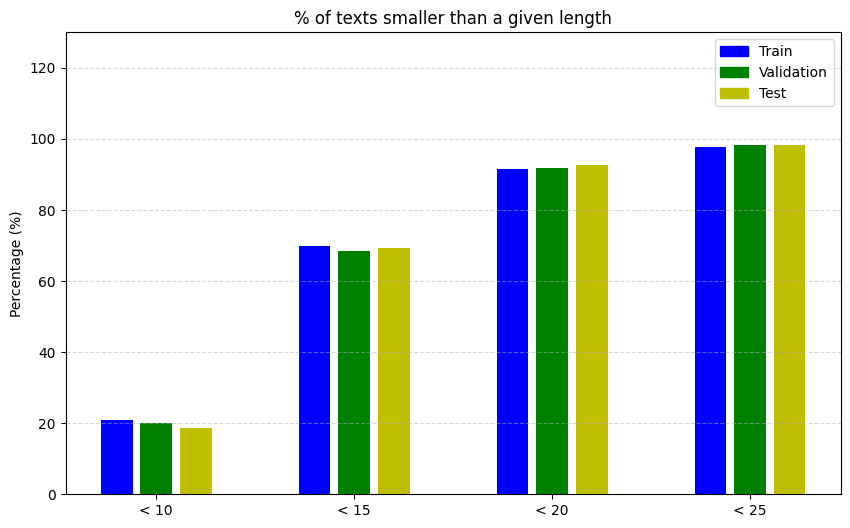

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Percentages
train = [np.float64(21.014285714285712), np.float64(69.85714285714286), np.float64(91.61428571428571), np.float64(97.8)]
val = [np.float64(20.133333333333333), np.float64(68.4), np.float64(91.8), np.float64(98.26666666666667)]
test = [np.float64(18.53333333333333), np.float64(69.33333333333334), np.float64(92.53333333333333), np.float64(98.2)]

# Flattened list of all bars (train, val, test per threshold)
bars = []
for i in range(4):
    bars.extend([train[i], val[i], test[i]])

# X positions for each bar
x_pos_bars = [1, 2, 3, 6, 7, 8, 11, 12, 13, 16, 17, 18]

# Where to place the tick labels
x_pos_labels = [2, 7, 12, 17]
labels = ['< 10', '< 15', '< 20', '< 25']

# Bar colors: Train, Validation, Test
colors = ['b', 'g', 'y'] * 4

# Legend
colors_values = {'Train': 'b', 'Validation': 'g', 'Test': 'y'}
labels2 = list(colors_values.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors_values[label]) for label in labels2]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_pos_bars, bars, color=colors)
plt.xticks(x_pos_labels, labels)
plt.legend(handles, labels2)
plt.ylim([0, 130])
plt.ylabel('Percentage (%)')
plt.title('% of texts smaller than a given length')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

As we can see almost all news are smaller than **15** in length when tokenized so choosing this lenght to truncate the tokenized news will not eliminate any information from the news in almost any case.

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad or truncate all sets to length 15
train_tokenized_pad = pad_sequences(train_tokenized, maxlen=15, truncating='pre', padding='pre')
valid_tokenized_pad = pad_sequences(valid_tokenized, maxlen=15, truncating='pre', padding='pre')
test_tokenized_pad  = pad_sequences(test_tokenized,  maxlen=15, truncating='pre', padding='pre')

In order to use the data with torch we have to transform the arrays into dataloader objects but first they need to be transformed into tensors.

In [22]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert padded sequences to PyTorch tensors (int type)
train_tensor = torch.Tensor(train_tokenized_pad).int()
valid_tensor = torch.Tensor(valid_tokenized_pad).int()
test_tensor  = torch.Tensor(test_tokenized_pad).int()

# Convert labels to tensors and create TensorDataset + DataLoader
train_set = TensorDataset(train_tensor, torch.Tensor(np.array(train_labels)))
valid_set = TensorDataset(valid_tensor, torch.Tensor(np.array(valid_labels)))
test_set  = TensorDataset(test_tensor,  torch.Tensor(np.array(test_labels)))

# Create DataLoaders
trainloader = DataLoader(train_set, batch_size=60)
validloader = DataLoader(valid_set, batch_size=60)
testloader  = DataLoader(test_set, batch_size=60)

### Word embeddings

We will try different word embeddings an select the one which performs better. We start by creating two functions: one which will be used to load the word embeddings and the other which will create the embedding matrix that we will feed to the embedding layer of the models.



In [23]:
# Download and unzip GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-04-19 10:37:03--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-19 10:37:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-19 10:37:03--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [24]:
def load_embedd(filename):
    words = []
    vectors = []
    file = open(filename, 'r', encoding="utf8")
    for line in file.readlines():
        row = line.split(' ')
        vocab = row[0]
        embd = row[1:]
        embd[-1] = embd[-1].rstrip()  # Remove newline
        embd = list(map(float, embd))  # Convert strings to floats
        words.append(vocab)
        vectors.append(embd)
    file.close()
    return words, vectors  # <- ADD THIS LINE

Function to create the embedding matrix.

In [26]:
def embed_matx(word_index, vocab, embeddings, length_vocab, length_embedding):
    embedding_matrix = np.zeros((length_vocab + 1, length_embedding))
    for word, i in word_index.items():
        if word in vocab:
            idx = vocab.index(word)
            vector = embeddings[idx]
            embedding_matrix[i] = vector
        if i == length_vocab:
            break
    return embedding_matrix

#### Glove (300 d)

We use GloVe embeddings of dimension 300.

In [25]:
# Load the embeddings
vocab_gv_300, vectors_gv_300 = load_embedd("glove.6B.300d.txt")

Now we create the embbeding matrix

In [27]:
word_index = tokenizer.word_index
# Embedding matrix
embedding_matrix_gv_300 = embed_matx(word_index = word_index, vocab = vocab_gv_300, embeddings = vectors_gv_300,
                             length_vocab = 117129, length_embedding = 300)

## Models

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time
from tqdm import tqdm

class BiLSTM(nn.Module):
    def __init__(self, nlabels, embedding_matrix=None, train_parameters=True, random_embeddings=False, dropout_prob=0.5):
        super().__init__()

        if random_embeddings:
            # Use random embeddings
            self.embedding = nn.Embedding(num_embeddings=117130, embedding_dim=300)
        else:
            # Use provided embedding matrix
            self.embedding = nn.Embedding(num_embeddings=embedding_matrix.shape[0],
                                          embedding_dim=embedding_matrix.shape[1])
            self.embedding.weight = nn.Parameter(torch.from_numpy(embedding_matrix).float(), requires_grad=train_parameters)

        # BiLSTM Layer
        self.lstm1 = nn.LSTM(input_size=300, hidden_size=70, num_layers=1, batch_first=True, bidirectional=True)

        # Dropout layer
        self.dropout = nn.Dropout(dropout_prob)

        # Convolutional Layer
        self.conv1_1 = nn.Conv2d(in_channels=1, out_channels=240, kernel_size=(3, 140), stride=1)

        # Linear Layers
        self.linear1 = nn.Linear(240, 64)
        self.linear2 = nn.Linear(64, nlabels)

        # Activation
        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.embedding(x)
        x_1, _ = self.lstm1(x.float())
        x_1 = self.conv1_1(x_1.unsqueeze(1)).squeeze(3)
        x_1 = self.relu(x_1)
        x_1 = F.max_pool1d(x_1, x_1.size(2)).squeeze(2)
        x = self.linear1(x_1)
        x = self.relu(x)
        x = self.dropout(x)  # Dropout applied here
        x = self.linear2(x)
        return self.logsoftmax(x)

In [29]:
class BiLSTM_extended(BiLSTM):
    def __init__(self, nlabels, embedding_matrix=None, train_parameters=True, random_embeddings=False, epochs=10, lr=0.001, patience=3, dropout_prob=0.5):
        super().__init__(nlabels, embedding_matrix, train_parameters, random_embeddings, dropout_prob)

        self.lr = lr
        self.epochs = epochs
        self.patience = patience  # Early stopping patience
        self.optim = optim.Adam(self.parameters(), lr=self.lr)
        self.criterion = nn.NLLLoss()

        self.loss_during_training = []
        self.valid_loss_during_training = []

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)

    def trainloop(self, trainloader, validloader):
        best_val_loss = float('inf')
        patience_counter = 0

        for e in range(self.epochs):
            start_time = time.time()
            self.train()

            running_loss = 0
            correct = 0
            total = 0

            # Use tqdm for progress bar
            for news, labels in tqdm(trainloader, desc=f"Epoch {e+1}/{self.epochs}", ncols=100):
                news, labels = news.to(self.device), labels.to(self.device)
                self.optim.zero_grad()
                out = self.forward(news.int())
                loss = self.criterion(out, labels.long())
                loss.backward()
                self.optim.step()

                running_loss += loss.item()
                top_p, top_class = out.topk(1, dim=1)
                correct += (top_class.squeeze() == labels).sum().item()
                total += labels.size(0)

            train_acc = correct / total
            self.loss_during_training.append(running_loss / len(trainloader))

            # Validation
            self.eval()
            with torch.no_grad():
                running_loss = 0
                correct = 0
                total = 0

                for news, labels in validloader:
                    news, labels = news.to(self.device), labels.to(self.device)
                    out = self.forward(news.int())
                    loss = self.criterion(out, labels.long())
                    running_loss += loss.item()
                    top_p, top_class = out.topk(1, dim=1)
                    correct += (top_class.squeeze() == labels).sum().item()
                    total += labels.size(0)

                val_acc = correct / total
                self.valid_loss_during_training.append(running_loss / len(validloader))

            # Check for early stopping
            val_loss = self.valid_loss_during_training[-1]
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= self.patience:
                    print(f"Early stopping triggered at epoch {e+1}.")
                    break

            print(f"Epoch {e+1}/{self.epochs} | "
                  f"Train Loss: {self.loss_during_training[-1]:.4f}, Acc: {train_acc:.4f} | "
                  f"Val Loss: {self.valid_loss_during_training[-1]:.4f}, Acc: {val_acc:.4f} | "
                  f"Time: {time.time() - start_time:.2f}s")

We train the CNN in **4** different scenarios:

  - **Random embeddings** + **Training embeddings**
  - **GloVe embeddings** + **Training embeddings**
  - **Random embeddings** + **Not training embeddings**
  - **GloVe embeddings** + **Not training embeddings**
  
We train the model for several epochs. This is done in order to select the optimal number of epochs, which occurs when the validation loss stops decreasing and starts increasing (Early Stopping).

### Random embeddings  + Training embeddings

In [30]:
# Initialize model
BiLSTM_train_random = BiLSTM_extended(
    nlabels=6,
    embedding_matrix=embedding_matrix_gv_300,
    train_parameters=True,
    epochs=20,
    lr=0.003,
    patience=3
)

# Train model
BiLSTM_train_random.trainloop(trainloader, validloader)

Epoch 1/20: 100%|█████████████████████████████████████████████████| 117/117 [00:19<00:00,  5.90it/s]


Epoch 1/20 | Train Loss: 0.6181, Acc: 0.6909 | Val Loss: 0.4582, Acc: 0.7907 | Time: 23.20s


Epoch 2/20: 100%|█████████████████████████████████████████████████| 117/117 [00:17<00:00,  6.59it/s]


Epoch 2/20 | Train Loss: 0.3613, Acc: 0.8550 | Val Loss: 0.4525, Acc: 0.7847 | Time: 21.19s


Epoch 3/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.49it/s]


Epoch 3/20 | Train Loss: 0.2376, Acc: 0.9144 | Val Loss: 0.6608, Acc: 0.7580 | Time: 21.48s


Epoch 4/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.38it/s]


Epoch 4/20 | Train Loss: 0.1555, Acc: 0.9470 | Val Loss: 1.0149, Acc: 0.7500 | Time: 21.88s


Epoch 5/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.31it/s]


Early stopping triggered at epoch 5.


### GloVe embeddings  + Training embeddings

In [31]:
# Initialize model with GloVe embeddings (trainable)
BiLSTM_train_not_random = BiLSTM_extended(
    nlabels=6,
    embedding_matrix=embedding_matrix_gv_300,  # Predefined embedding matrix (e.g., GloVe 300d)
    train_parameters=True,                     # Allow fine-tuning
    epochs=20,                                 # Run for more epochs (early stopping will kick in if needed)
    lr=0.003                                   # Learning rate
)

# Train model
BiLSTM_train_not_random.trainloop(trainloader, validloader)

Epoch 1/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.37it/s]


Epoch 1/20 | Train Loss: 0.6344, Acc: 0.6647 | Val Loss: 0.4502, Acc: 0.7940 | Time: 21.85s


Epoch 2/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.38it/s]


Epoch 2/20 | Train Loss: 0.3726, Acc: 0.8457 | Val Loss: 0.4668, Acc: 0.7887 | Time: 21.83s


Epoch 3/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.35it/s]


Epoch 3/20 | Train Loss: 0.2451, Acc: 0.9119 | Val Loss: 0.6523, Acc: 0.7653 | Time: 21.94s


Epoch 4/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.33it/s]


Early stopping triggered at epoch 4.


### Random embeddings  + Not training embeddings

In [32]:
# Initialize model with random embeddings (non-trainable)
BiLSTM_not_train_random = BiLSTM_extended(
    nlabels=6,
    embedding_matrix=None,        # Will use random embeddings internally
    train_parameters=False,       # Embeddings won't be updated during training
    random_embeddings=True,       # Use random embeddings
    epochs=20,                    # Increase epochs (early stopping is active)
    lr=0.003                      # Learning rate
)

# Train model
BiLSTM_not_train_random.trainloop(trainloader, validloader)

Epoch 1/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.36it/s]


Epoch 1/20 | Train Loss: 0.6646, Acc: 0.6449 | Val Loss: 0.5471, Acc: 0.7160 | Time: 21.91s


Epoch 2/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.37it/s]


Epoch 2/20 | Train Loss: 0.4421, Acc: 0.8014 | Val Loss: 0.5391, Acc: 0.7407 | Time: 21.89s


Epoch 3/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.35it/s]


Epoch 3/20 | Train Loss: 0.3010, Acc: 0.8794 | Val Loss: 0.7963, Acc: 0.7207 | Time: 21.94s


Epoch 4/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.36it/s]


Epoch 4/20 | Train Loss: 0.2141, Acc: 0.9239 | Val Loss: 1.3194, Acc: 0.7160 | Time: 21.93s


Epoch 5/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.36it/s]


Early stopping triggered at epoch 5.


### GloVe embeddings  + Not training embeddings

In [33]:
# Initialize model with random embeddings (non-trainable)
BiLSTM_not_train_random = BiLSTM_extended(
    nlabels=6,
    embedding_matrix=None,        # Will use random embeddings internally
    train_parameters=False,       # Embeddings won't be updated during training
    random_embeddings=True,       # Use random embeddings
    epochs=20,                    # Increase epochs (early stopping is active)
    lr=0.003                      # Learning rate
)

# Train model
BiLSTM_not_train_random.trainloop(trainloader, validloader)

Epoch 1/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.34it/s]


Epoch 1/20 | Train Loss: 0.6729, Acc: 0.6376 | Val Loss: 0.5383, Acc: 0.7340 | Time: 21.96s


Epoch 2/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.37it/s]


Epoch 2/20 | Train Loss: 0.4353, Acc: 0.8064 | Val Loss: 0.5549, Acc: 0.7253 | Time: 21.90s


Epoch 3/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.36it/s]


Epoch 3/20 | Train Loss: 0.2897, Acc: 0.8899 | Val Loss: 0.6955, Acc: 0.7087 | Time: 21.93s


Epoch 4/20: 100%|█████████████████████████████████████████████████| 117/117 [00:18<00:00,  6.34it/s]


Early stopping triggered at epoch 4.


## Testing performance

We join the **train** and **validation** datasets and we train the model with this dataset using the optimal number of epochs. Then we evaluate the model with the **test** set. First we need to modify a bit the class used previously.

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
import numpy as np
from tqdm import tqdm

class BiLSTM(nn.Module):
    def __init__(self, nlabels, embedding_matrix=None, train_parameters=True, random_embeddings=False, dropout_prob=0.5):
        super().__init__()

        # Handle embeddings based on random_embeddings flag
        if random_embeddings:
            # Use random embeddings
            self.embedding = nn.Embedding(num_embeddings=117130, embedding_dim=300)
        elif embedding_matrix is not None:
            # Use provided embedding matrix
            self.embedding = nn.Embedding(num_embeddings=embedding_matrix.shape[0],
                                          embedding_dim=embedding_matrix.shape[1])
            self.embedding.weight = nn.Parameter(torch.from_numpy(embedding_matrix).float(), requires_grad=train_parameters)
        else:
            raise ValueError("embedding_matrix must be provided when random_embeddings is False.")

        # BiLSTM Layer
        self.lstm1 = nn.LSTM(input_size=300, hidden_size=70, num_layers=1, batch_first=True, bidirectional=True)

        # Dropout layer
        self.dropout = nn.Dropout(dropout_prob)

        # Convolutional Layer
        self.conv1_1 = nn.Conv2d(in_channels=1, out_channels=240, kernel_size=(3, 140), stride=1)

        # Linear Layers
        self.linear1 = nn.Linear(240, 64)
        self.linear2 = nn.Linear(64, nlabels)

        # Activation
        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.embedding(x)
        x_1, _ = self.lstm1(x.float())
        x_1 = self.conv1_1(x_1.unsqueeze(1)).squeeze(3)
        x_1 = self.relu(x_1)
        x_1 = F.max_pool1d(x_1, x_1.size(2)).squeeze(2)
        x = self.linear1(x_1)
        x = self.relu(x)
        x = self.dropout(x)  # Dropout applied here
        x = self.linear2(x)
        return self.logsoftmax(x)


class BiLSTM_extended(BiLSTM):
    def __init__(self, nlabels, embedding_matrix=None, train_parameters=True, random_embeddings=False, epochs=100, lr=0.001, patience=3, dropout_prob=0.5):
        # Initialize the parent class with the appropriate parameters
        super().__init__(nlabels, embedding_matrix, train_parameters, random_embeddings, dropout_prob)

        self.lr = lr
        self.optim = optim.Adam(self.parameters(), lr=self.lr)
        self.epochs = epochs
        self.patience = patience  # Early stopping patience
        self.criterion = nn.NLLLoss()  # Loss function

        self.loss_during_training = []
        self.valid_loss_during_training = []

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)

    def trainloop(self, trainloader, validloader):
        best_val_loss = float('inf')
        patience_counter = 0

        for e in range(self.epochs):
            start_time = time.time()
            self.train()

            running_loss = 0
            correct = 0
            total = 0
            accuracies = []

            # Use tqdm for progress bar during training
            for news, labels in tqdm(trainloader, desc=f"Epoch {e+1}/{self.epochs}", ncols=100):
                news, labels = news.to(self.device), labels.to(self.device)
                self.optim.zero_grad()  # Reset gradients
                out = self.forward(news.int())
                loss = self.criterion(out, labels.long())
                loss.backward()

                self.optim.step()

                running_loss += loss.item()
                top_p, top_class = out.topk(1, dim=1)
                equals = (top_class.squeeze() == labels)

                correct += equals.sum().item()
                total += labels.size(0)

            train_acc = correct / total
            self.loss_during_training.append(running_loss / len(trainloader))

            # Validation
            self.eval()
            with torch.no_grad():
                running_loss = 0
                correct = 0
                total = 0

                for news, labels in validloader:
                    news, labels = news.to(self.device), labels.to(self.device)
                    out = self.forward(news.int())
                    loss = self.criterion(out, labels.long())
                    running_loss += loss.item()
                    top_p, top_class = out.topk(1, dim=1)
                    equals = (top_class.squeeze() == labels)
                    correct += equals.sum().item()
                    total += labels.size(0)

                val_acc = correct / total
                self.valid_loss_during_training.append(running_loss / len(validloader))

            # Check for early stopping
            val_loss = self.valid_loss_during_training[-1]
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= self.patience:
                    print(f"Early stopping triggered at epoch {e+1}.")
                    break

            print(f"Epoch {e+1}/{self.epochs} | "
                  f"Train Loss: {self.loss_during_training[-1]:.4f}, Acc: {train_acc:.4f} | "
                  f"Val Loss: {self.valid_loss_during_training[-1]:.4f}, Acc: {val_acc:.4f} | "
                  f"Time: {time.time() - start_time:.2f}s")

    def eval_performance(self, dataloader):
        predictions = np.empty((1, 1))

        with torch.no_grad():
            for news, labels in dataloader:
                news = news.to(self.device)
                logprobs = self.forward(news)
                top_p, top_class = logprobs.topk(1, dim=1)

                top_class_array = np.array(top_class.cpu())
                predictions = np.concatenate((predictions, top_class_array), axis=0)

        return predictions[1:]

In [35]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np  # Assuming you have numpy imported

# Assuming `train_tokenized_pad`, `valid_tokenized_pad`, `train_labels`, `valid_labels`, `test_tokenized_pad`, `test_labels`
# are already defined

# Join train and validation sequences
train_valid_tokenized_pad = np.concatenate((train_tokenized_pad, valid_tokenized_pad), axis=0)
# Join train and validation labels
train_valid_labels = np.concatenate((np.array(train_labels), np.array(valid_labels)), axis=0)

# Create tensor objects

# Train + validation
train_valid_tensor = torch.Tensor(train_valid_tokenized_pad).int()
# Test
test_tensor = torch.Tensor(test_tokenized_pad).int()

# Transform tensors into data loader objects

# Train + validation
train_valid_set = TensorDataset(train_valid_tensor, torch.Tensor(train_valid_labels).long())
train_valid_loader = DataLoader(train_valid_set, batch_size=60, shuffle=True)  # Added shuffle=True for better training

# Test
test_set = TensorDataset(test_tensor, torch.Tensor(test_labels).long())
testloader = DataLoader(test_set, batch_size=60)

# Move tensors to the correct device (CUDA if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modify the DataLoader iteration to move the data to the correct device on the fly
def move_to_device(loader, device):
    return [(x.to(device), y.to(device)) for x, y in loader]

# Move DataLoader batches to the correct device (CUDA if available)
train_valid_loader = move_to_device(train_valid_loader, device)
testloader = move_to_device(testloader, device)

# Now, the data is correctly moved to the device for training and evaluation

### Random embeddings  + Training embeddings

In [36]:
# Initialize model
BiLSTM_test_train_random = BiLSTM_extended(
    nlabels=6,                          # Number of labels
    epochs=20,                            # Number of epochs
    lr=0.003,                            # Learning rate
    train_parameters=True,               # Trainable embeddings
    random_embeddings=True               # Use random embeddings
)

# Move model to the correct device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BiLSTM_test_train_random.to(device)

# Separate train and validation loaders (if you haven't already)
trainloader, validloader = train_valid_loader, validloader

# Train model
BiLSTM_test_train_random.trainloop(trainloader, validloader)

# Get predictions
predictions1 = BiLSTM_test_train_random.eval_performance(testloader)

Epoch 1/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.41it/s]


Epoch 1/20 | Train Loss: 0.6678, Acc: 0.6378 | Val Loss: 0.4199, Acc: 0.8433 | Time: 25.69s


Epoch 2/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 2/20 | Train Loss: 0.4323, Acc: 0.8071 | Val Loss: 0.2701, Acc: 0.9060 | Time: 25.74s


Epoch 3/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 3/20 | Train Loss: 0.2854, Acc: 0.8874 | Val Loss: 0.1942, Acc: 0.9320 | Time: 25.71s


Epoch 4/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.41it/s]


Epoch 4/20 | Train Loss: 0.1916, Acc: 0.9296 | Val Loss: 0.1632, Acc: 0.9480 | Time: 25.66s


Epoch 5/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 5/20 | Train Loss: 0.1594, Acc: 0.9465 | Val Loss: 0.0937, Acc: 0.9713 | Time: 25.70s


Epoch 6/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 6/20 | Train Loss: 0.1200, Acc: 0.9619 | Val Loss: 0.0762, Acc: 0.9760 | Time: 25.72s


Epoch 7/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.38it/s]


Epoch 7/20 | Train Loss: 0.0666, Acc: 0.9768 | Val Loss: 0.0271, Acc: 0.9847 | Time: 25.77s


Epoch 8/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 8/20 | Train Loss: 0.0367, Acc: 0.9867 | Val Loss: 0.0173, Acc: 0.9900 | Time: 25.75s


Epoch 9/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 9/20 | Train Loss: 0.0371, Acc: 0.9880 | Val Loss: 0.0145, Acc: 0.9933 | Time: 25.73s


Epoch 10/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 10/20 | Train Loss: 0.0199, Acc: 0.9924 | Val Loss: 0.0124, Acc: 0.9920 | Time: 25.70s


Epoch 11/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 11/20 | Train Loss: 0.0255, Acc: 0.9911 | Val Loss: 0.0107, Acc: 0.9940 | Time: 25.69s


Epoch 12/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 12/20 | Train Loss: 0.0226, Acc: 0.9914 | Val Loss: 0.0344, Acc: 0.9907 | Time: 25.69s


Epoch 13/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 13/20 | Train Loss: 0.0289, Acc: 0.9904 | Val Loss: 0.0315, Acc: 0.9880 | Time: 25.71s


Epoch 14/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.38it/s]


Early stopping triggered at epoch 14.


In [37]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming 'test_labels' and 'predictions1' are the actual test labels and the predicted labels
# Convert predictions1 to the correct shape if needed
predictions1 = predictions1.flatten()  # Make sure predictions are a 1D array

# If test_labels is in the form of a 2D array with a single column, reshape it into a 1D array
test_labels = np.array(test_labels).flatten()

# Print classification report
print(classification_report(test_labels, predictions1))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       750
           1       0.72      0.68      0.70       750

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.70      0.70      1500



In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Flatten predictions1 if needed (ensure predictions are 1D)
predictions1 = predictions1.flatten()

# If test_labels is in a 2D array with a single column, reshape it into a 1D array
test_labels = np.array(test_labels).flatten()

# Print confusion matrix
print(confusion_matrix(test_labels, predictions1))

[[548 202]
 [242 508]]


### GloVe embeddings  + Training embeddings

In [52]:
# Initialize model with non-random embeddings (random_embeddings=False)
BiLSTM_test_train_not_random = BiLSTM_extended(
    nlabels=6,                             # Number of output classes
    embedding_matrix=embedding_matrix_gv_300,  # <- Must include this
    epochs=20,                              # Number of epochs
    lr=0.003,                              # Learning rate
    train_parameters=True,                 # Update embedding weights during training
    random_embeddings=False,               # Use pre-trained embeddings
    dropout_prob=0.5                       # Dropout probability
)

# Train the model with non-random embeddings
BiLSTM_test_train_not_random.trainloop(train_valid_loader, validloader)

# Get predictions for the test set
predictions_2 = BiLSTM_test_train_not_random.eval_performance(testloader)

Epoch 1/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 1/20 | Train Loss: 0.6216, Acc: 0.6727 | Val Loss: 0.3634, Acc: 0.8673 | Time: 25.72s


Epoch 2/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 2/20 | Train Loss: 0.3656, Acc: 0.8491 | Val Loss: 0.2249, Acc: 0.9267 | Time: 25.73s


Epoch 3/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 3/20 | Train Loss: 0.2462, Acc: 0.9092 | Val Loss: 0.1488, Acc: 0.9513 | Time: 25.69s


Epoch 4/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.38it/s]


Epoch 4/20 | Train Loss: 0.1707, Acc: 0.9396 | Val Loss: 0.0997, Acc: 0.9680 | Time: 25.77s


Epoch 5/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 5/20 | Train Loss: 0.1184, Acc: 0.9601 | Val Loss: 0.0753, Acc: 0.9760 | Time: 25.71s


Epoch 6/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.41it/s]


Epoch 6/20 | Train Loss: 0.0883, Acc: 0.9708 | Val Loss: 0.0506, Acc: 0.9827 | Time: 25.68s


Epoch 7/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 7/20 | Train Loss: 0.0697, Acc: 0.9740 | Val Loss: 0.0372, Acc: 0.9833 | Time: 25.72s


Epoch 8/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 8/20 | Train Loss: 0.0525, Acc: 0.9811 | Val Loss: 0.0197, Acc: 0.9913 | Time: 25.74s


Epoch 9/20: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.38it/s]


Epoch 9/20 | Train Loss: 0.0342, Acc: 0.9874 | Val Loss: 0.0217, Acc: 0.9927 | Time: 25.76s


Epoch 10/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 10/20 | Train Loss: 0.0270, Acc: 0.9909 | Val Loss: 0.0119, Acc: 0.9940 | Time: 25.69s


Epoch 11/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 11/20 | Train Loss: 0.0256, Acc: 0.9909 | Val Loss: 0.0125, Acc: 0.9933 | Time: 25.74s


Epoch 12/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 12/20 | Train Loss: 0.0229, Acc: 0.9924 | Val Loss: 0.0098, Acc: 0.9953 | Time: 25.69s


Epoch 13/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.38it/s]


Epoch 13/20 | Train Loss: 0.0240, Acc: 0.9922 | Val Loss: 0.0149, Acc: 0.9927 | Time: 25.75s


Epoch 14/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 14/20 | Train Loss: 0.0263, Acc: 0.9929 | Val Loss: 0.0109, Acc: 0.9940 | Time: 25.70s


Epoch 15/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 15/20 | Train Loss: 0.0162, Acc: 0.9941 | Val Loss: 0.0094, Acc: 0.9960 | Time: 25.74s


Epoch 16/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 16/20 | Train Loss: 0.0130, Acc: 0.9952 | Val Loss: 0.0103, Acc: 0.9947 | Time: 25.75s


Epoch 17/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 17/20 | Train Loss: 0.0168, Acc: 0.9939 | Val Loss: 0.0075, Acc: 0.9960 | Time: 25.74s


Epoch 18/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 18/20 | Train Loss: 0.0147, Acc: 0.9934 | Val Loss: 0.0164, Acc: 0.9940 | Time: 25.73s


Epoch 19/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.41it/s]


Epoch 19/20 | Train Loss: 0.0155, Acc: 0.9942 | Val Loss: 0.0073, Acc: 0.9973 | Time: 25.68s


Epoch 20/20: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 20/20 | Train Loss: 0.0152, Acc: 0.9945 | Val Loss: 0.0082, Acc: 0.9947 | Time: 25.72s


In [53]:
# Print classification report for the model with non-random embeddings
print("Classification Report:")
print(classification_report(np.array(test_labels).reshape(len(test_labels), 1), predictions_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       750
           1       0.72      0.72      0.72       750

    accuracy                           0.72      1500
   macro avg       0.72      0.72      0.72      1500
weighted avg       0.72      0.72      0.72      1500



In [54]:
# Print confusion matrix for the model with non-random embeddings
print("Confusion Matrix:")
print(confusion_matrix(np.array(test_labels).reshape(len(test_labels), 1), predictions_2))

Confusion Matrix:
[[535 215]
 [207 543]]


### Random embeddings  +  Not training embeddings

In [46]:
# Initialize model with random embeddings (random_embeddings=True)
BiLSTM_test_not_train_random = BiLSTM_extended(
    nlabels=6,                       # Number of output classes
    epochs=30,                         # Number of epochs
    lr=0.003,                         # Learning rate
    train_parameters=False,           # Do not update embedding weights
    random_embeddings=True,           # Use random embeddings
    dropout_prob=0.5                  # Dropout probability
)

# Train the model with random embeddings
BiLSTM_test_not_train_random.trainloop(train_valid_loader, validloader)

# Get predictions for the test set
predictions_3 = BiLSTM_test_not_train_random.eval_performance(testloader)

Epoch 1/30: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.32it/s]


Epoch 1/30 | Train Loss: 0.6635, Acc: 0.6429 | Val Loss: 0.4391, Acc: 0.8180 | Time: 25.95s


Epoch 2/30: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 2/30 | Train Loss: 0.4402, Acc: 0.8046 | Val Loss: 0.3120, Acc: 0.8773 | Time: 25.67s


Epoch 3/30: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.38it/s]


Epoch 3/30 | Train Loss: 0.2981, Acc: 0.8873 | Val Loss: 0.1961, Acc: 0.9280 | Time: 25.81s


Epoch 4/30: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.38it/s]


Epoch 4/30 | Train Loss: 0.2007, Acc: 0.9287 | Val Loss: 0.1568, Acc: 0.9460 | Time: 25.78s


Epoch 5/30: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.41it/s]


Epoch 5/30 | Train Loss: 0.1586, Acc: 0.9489 | Val Loss: 0.1249, Acc: 0.9573 | Time: 25.67s


Epoch 6/30: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 6/30 | Train Loss: 0.1399, Acc: 0.9561 | Val Loss: 0.0786, Acc: 0.9727 | Time: 25.70s


Epoch 7/30: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 7/30 | Train Loss: 0.0910, Acc: 0.9713 | Val Loss: 0.0307, Acc: 0.9860 | Time: 25.75s


Epoch 8/30: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.38it/s]


Epoch 8/30 | Train Loss: 0.0454, Acc: 0.9832 | Val Loss: 0.0264, Acc: 0.9893 | Time: 25.78s


Epoch 9/30: 100%|█████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 9/30 | Train Loss: 0.0310, Acc: 0.9894 | Val Loss: 0.0195, Acc: 0.9927 | Time: 25.73s


Epoch 10/30: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.39it/s]


Epoch 10/30 | Train Loss: 0.0182, Acc: 0.9931 | Val Loss: 0.0114, Acc: 0.9947 | Time: 25.73s


Epoch 11/30: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 11/30 | Train Loss: 0.0165, Acc: 0.9934 | Val Loss: 0.0147, Acc: 0.9940 | Time: 25.69s


Epoch 12/30: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.41it/s]


Epoch 12/30 | Train Loss: 0.0119, Acc: 0.9952 | Val Loss: 0.0104, Acc: 0.9940 | Time: 25.66s


Epoch 13/30: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Epoch 13/30 | Train Loss: 0.0181, Acc: 0.9939 | Val Loss: 0.0152, Acc: 0.9953 | Time: 25.71s


Epoch 14/30: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.41it/s]


Epoch 14/30 | Train Loss: 0.0359, Acc: 0.9901 | Val Loss: 0.0203, Acc: 0.9947 | Time: 25.68s


Epoch 15/30: 100%|████████████████████████████████████████████████| 142/142 [00:22<00:00,  6.40it/s]


Early stopping triggered at epoch 15.


In [47]:
# Print classification report for the model with random embeddings
print("Classification Report:")
print(classification_report(np.array(test_labels).reshape(len(test_labels), 1), predictions_3))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       750
           1       0.68      0.78      0.73       750

    accuracy                           0.71      1500
   macro avg       0.72      0.71      0.71      1500
weighted avg       0.72      0.71      0.71      1500



In [48]:
# Print confusion matrix for the model with random embeddings
print("Confusion Matrix:")
print(confusion_matrix(np.array(test_labels).reshape(len(test_labels), 1), predictions_3))

Confusion Matrix:
[[480 270]
 [163 587]]


### GloVe embeddings  +  Not training embeddings

In [49]:
# Initialize model with pre-trained embeddings (random_embeddings=False)
BiLSTM_test_not_train_not_random = BiLSTM_extended(
    nlabels=6,                                 # Number of output classes
    embedding_matrix=embedding_matrix_gv_300,  # <- Add this to use pre-trained embeddings
    epochs=30,                                 # Number of epochs
    lr=0.003,                                  # Learning rate
    train_parameters=False,                    # Do not update embedding weights
    random_embeddings=False,                   # Use pre-trained embeddings
    dropout_prob=0.5                           # Dropout probability
)

# Train the model with pre-trained embeddings
BiLSTM_test_not_train_not_random.trainloop(train_valid_loader, validloader)

# Get predictions for the test set
predictions_4 = BiLSTM_test_not_train_not_random.eval_performance(testloader)

Epoch 1/30: 100%|█████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.90it/s]


Epoch 1/30 | Train Loss: 0.6060, Acc: 0.6902 | Val Loss: 0.4443, Acc: 0.8060 | Time: 24.23s


Epoch 2/30: 100%|█████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.93it/s]


Epoch 2/30 | Train Loss: 0.4329, Acc: 0.8112 | Val Loss: 0.3222, Acc: 0.8740 | Time: 24.01s


Epoch 3/30: 100%|█████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.93it/s]


Epoch 3/30 | Train Loss: 0.3452, Acc: 0.8564 | Val Loss: 0.2473, Acc: 0.9047 | Time: 24.02s


Epoch 4/30: 100%|█████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.93it/s]


Epoch 4/30 | Train Loss: 0.2756, Acc: 0.8892 | Val Loss: 0.2065, Acc: 0.9260 | Time: 24.01s


Epoch 5/30: 100%|█████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.94it/s]


Epoch 5/30 | Train Loss: 0.2406, Acc: 0.9119 | Val Loss: 0.1725, Acc: 0.9413 | Time: 24.00s


Epoch 6/30: 100%|█████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.94it/s]


Epoch 6/30 | Train Loss: 0.2011, Acc: 0.9293 | Val Loss: 0.1310, Acc: 0.9540 | Time: 23.97s


Epoch 7/30: 100%|█████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.94it/s]


Epoch 7/30 | Train Loss: 0.1592, Acc: 0.9474 | Val Loss: 0.1038, Acc: 0.9640 | Time: 23.99s


Epoch 8/30: 100%|█████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.92it/s]


Epoch 8/30 | Train Loss: 0.1261, Acc: 0.9574 | Val Loss: 0.0876, Acc: 0.9733 | Time: 24.05s


Epoch 9/30: 100%|█████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.93it/s]


Epoch 9/30 | Train Loss: 0.1082, Acc: 0.9651 | Val Loss: 0.0735, Acc: 0.9753 | Time: 24.01s


Epoch 10/30: 100%|████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.94it/s]


Epoch 10/30 | Train Loss: 0.0896, Acc: 0.9692 | Val Loss: 0.0651, Acc: 0.9767 | Time: 23.99s


Epoch 11/30: 100%|████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.94it/s]


Epoch 11/30 | Train Loss: 0.0745, Acc: 0.9738 | Val Loss: 0.0399, Acc: 0.9853 | Time: 23.98s


Epoch 12/30: 100%|████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.94it/s]


Epoch 12/30 | Train Loss: 0.0636, Acc: 0.9771 | Val Loss: 0.0834, Acc: 0.9733 | Time: 23.99s


Epoch 13/30: 100%|████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.93it/s]


Epoch 13/30 | Train Loss: 0.0553, Acc: 0.9804 | Val Loss: 0.0638, Acc: 0.9807 | Time: 24.01s


Epoch 14/30: 100%|████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.93it/s]


Epoch 14/30 | Train Loss: 0.0524, Acc: 0.9834 | Val Loss: 0.0265, Acc: 0.9893 | Time: 24.01s


Epoch 15/30: 100%|████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.93it/s]


Epoch 15/30 | Train Loss: 0.0357, Acc: 0.9867 | Val Loss: 0.0207, Acc: 0.9887 | Time: 24.04s


Epoch 16/30: 100%|████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.93it/s]


Epoch 16/30 | Train Loss: 0.0310, Acc: 0.9886 | Val Loss: 0.0222, Acc: 0.9887 | Time: 24.00s


Epoch 17/30: 100%|████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.93it/s]


Epoch 17/30 | Train Loss: 0.0287, Acc: 0.9896 | Val Loss: 0.0207, Acc: 0.9940 | Time: 24.01s


Epoch 18/30: 100%|████████████████████████████████████████████████| 142/142 [00:20<00:00,  6.94it/s]


Early stopping triggered at epoch 18.


In [50]:
# Print classification report for the model with pre-trained embeddings
print("Classification Report:")
print(classification_report(np.array(test_labels).reshape(len(test_labels), 1), predictions_4))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       750
           1       0.79      0.75      0.77       750

    accuracy                           0.78      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.78      0.78      0.78      1500



In [51]:
# Print confusion matrix for the model with pre-trained embeddings
print("Confusion Matrix:")
print(confusion_matrix(np.array(test_labels).reshape(len(test_labels), 1), predictions_4))

Confusion Matrix:
[[604 146]
 [187 563]]
